In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
df=pd.read_csv("top50.csv",encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
#Calculates the number of rows and columns
print(df.shape)

(50, 14)


In [5]:
#Renaming the columns
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
df.isnull().sum()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [7]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

Unnamed: 0           int64
track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [8]:
#Calculating the number of songs of each genre
print(type(df['Genre']))
popular_genre=df.groupby('Genre').size()
print(popular_genre)
genre_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


In [9]:
#Calculating the number of songs by each of the artists
print(df.groupby('artist_name').size())
popular_artist=df.groupby('artist_name').size()
print(popular_artist)
artist_list=df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      

In [10]:
df.isnull().sum()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [11]:
pd.set_option('precision', 3)
df.describe()

,Unnamed: 0,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,25.500,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,14.577,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,1.000,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,13.250,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,25.500,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,37.750,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,50.000,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


Unnamed: 0          0.000
beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness(dB)       -0.832
Liveness            2.204
Valence            -0.046
Length              0.749
Acousticness        1.135
Speechiness         1.378
Popularity         -1.503
dtype: float64


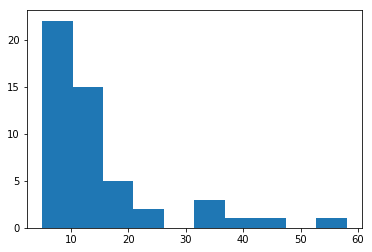

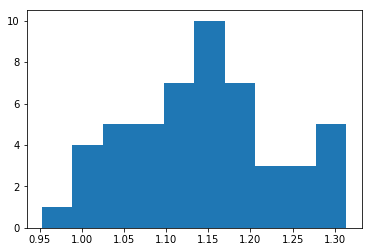

In [12]:
#Finding out the skew for each attribute
skew=df.skew()
print(skew)
# Removing the skew by using the boxcox transformations
transform=np.asarray(df[['Liveness']].values)
df_transform = stats.boxcox(transform)[0]
# Plotting a histogram to show the difference 
plt.hist(df['Liveness'],bins=10) #original data
plt.show()
plt.hist(df_transform,bins=10) #corrected skew data
plt.show()

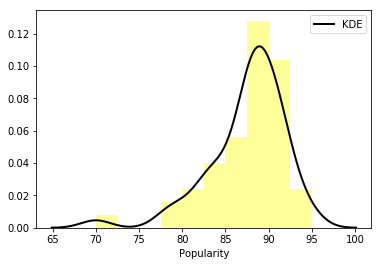

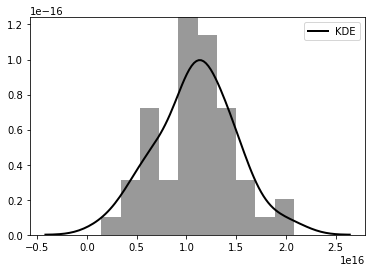

In [13]:
transform1=np.asarray(df[['Popularity']].values)
df_transform1 = stats.boxcox(transform1)[0]
# Plotting a histogram to show the difference 
# plt.hist(df['Popularity'],bins=10) original data
# plt.show()
# plt.hist(df_transform1,bins=10) #corrected skew data
# plt.show()
sns.distplot(df['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') #corrected skew data
plt.show()

In [14]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  Unnamed: 0  beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  \
Unnamed: 0             1.000            -0.263   0.132         0.053        -0.014     0.102   
beats_per_minute      -0.263             1.000   0.012        -0.092         0.014    -0.033   
Energy                 0.132             0.012   1.000        -0.049         0.635     0.013   
Danceability           0.053            -0.092  -0.049         1.000         0.009    -0.261   
Loudness(dB)          -0.014             0.014   0.635         0.009         1.000     0.114   
Liveness               0.102            -0.033   0.013        -0.261         0.114     1.000   
Valence                0.113            -0.048   0.467         0.155         0.317    -0.187   
Length                 0.045            -0.198   0.189        -0.079         0.165     0.202   
Acousticness           0.058            -0.010  -0.211        -0.128        -0.040     0.204   
Speechiness           -0.232            

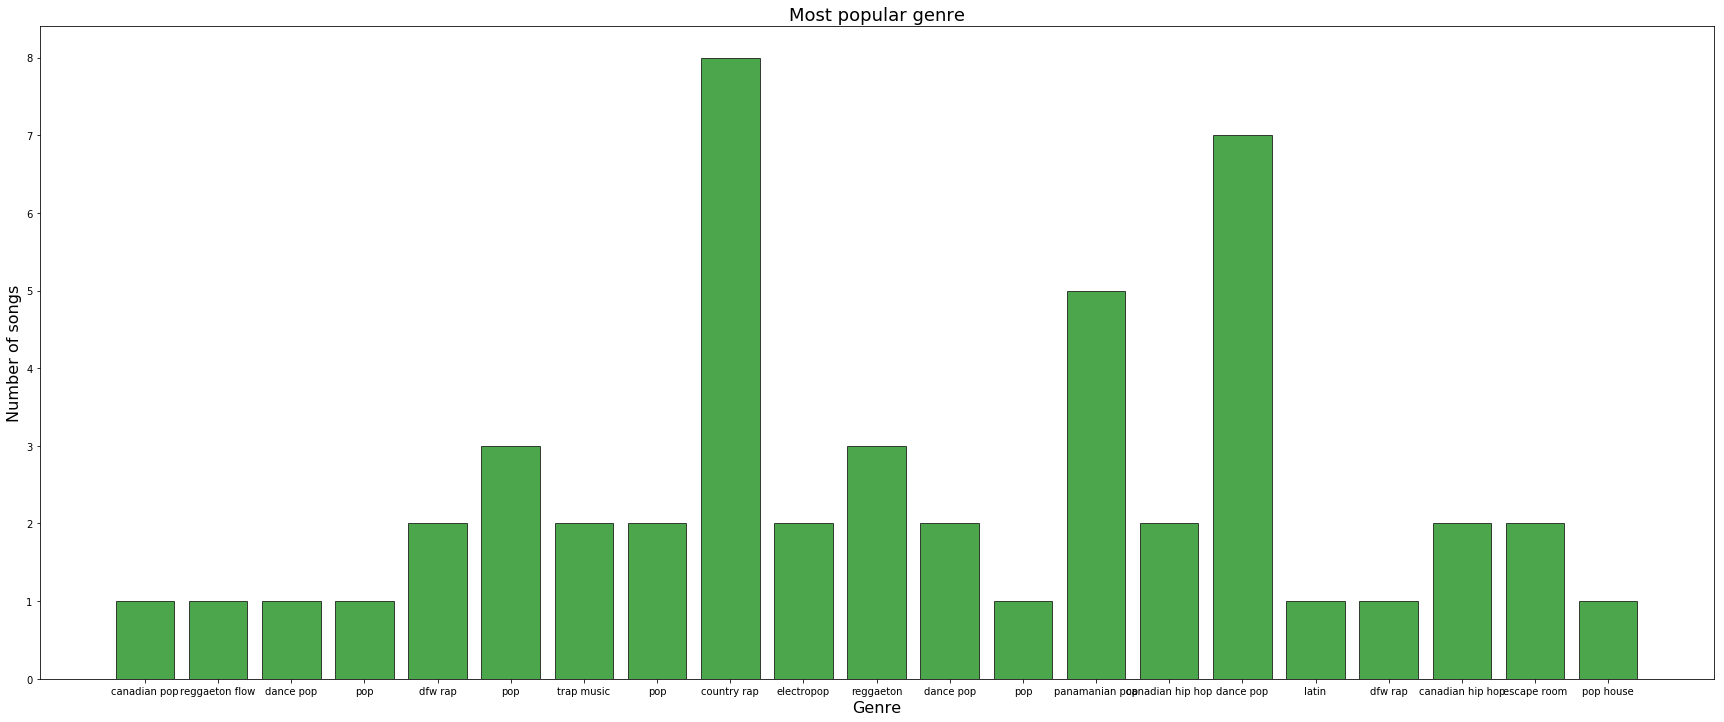

In [15]:
# Bar graph to see the number of songs of each genre
fig, ax=plt.subplots(figsize=(30,12))
length=np.arange(len(popular_genre))
plt.bar(length,popular_genre,color='green',edgecolor='black',alpha=0.7)
plt.xticks(length,genre_list)
plt.title('Most popular genre',fontsize=18)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Number of songs',fontsize=16)
plt.show()

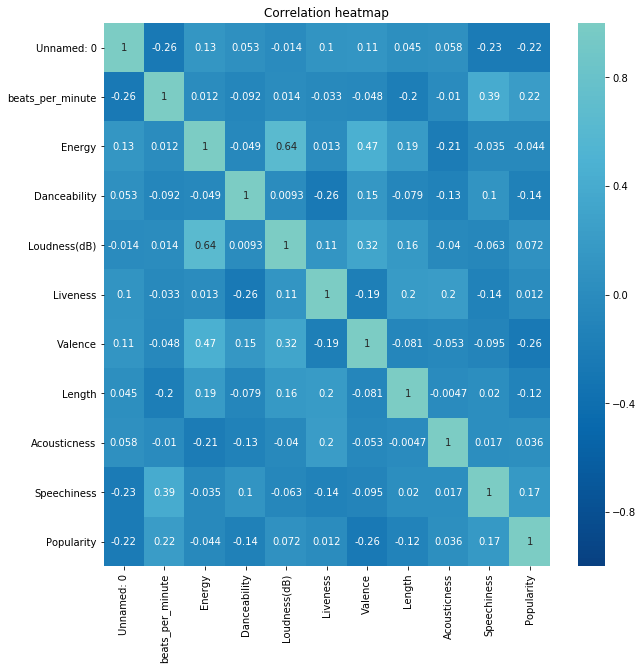

In [16]:
# heatmap of the correlation 
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

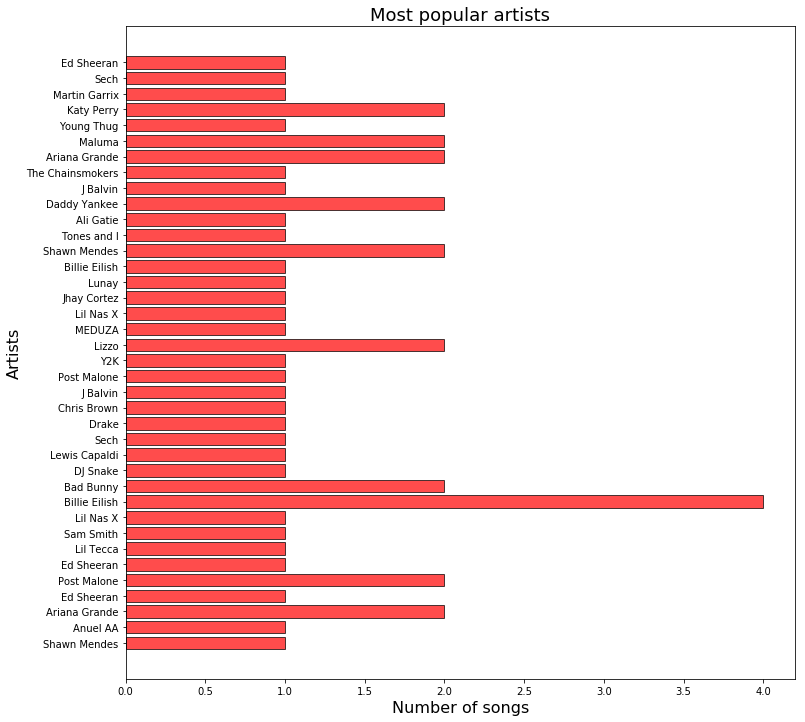

In [17]:
fig, ax=plt.subplots(figsize=(12,12))
length=np.arange(len(popular_artist))
plt.barh(length,popular_artist,color='red',edgecolor='black',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=16)
plt.show()

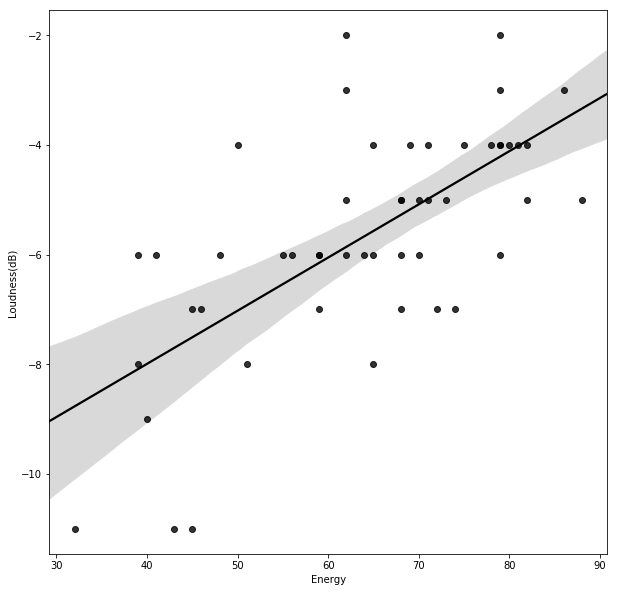

In [18]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='black')

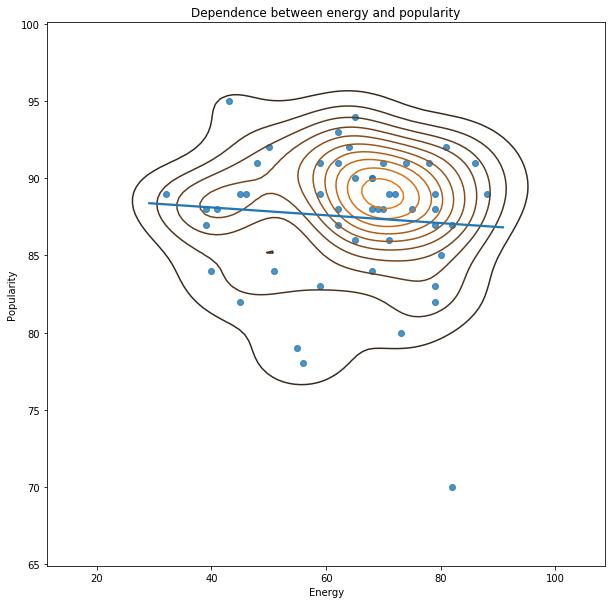

In [19]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Energy,df.Popularity)

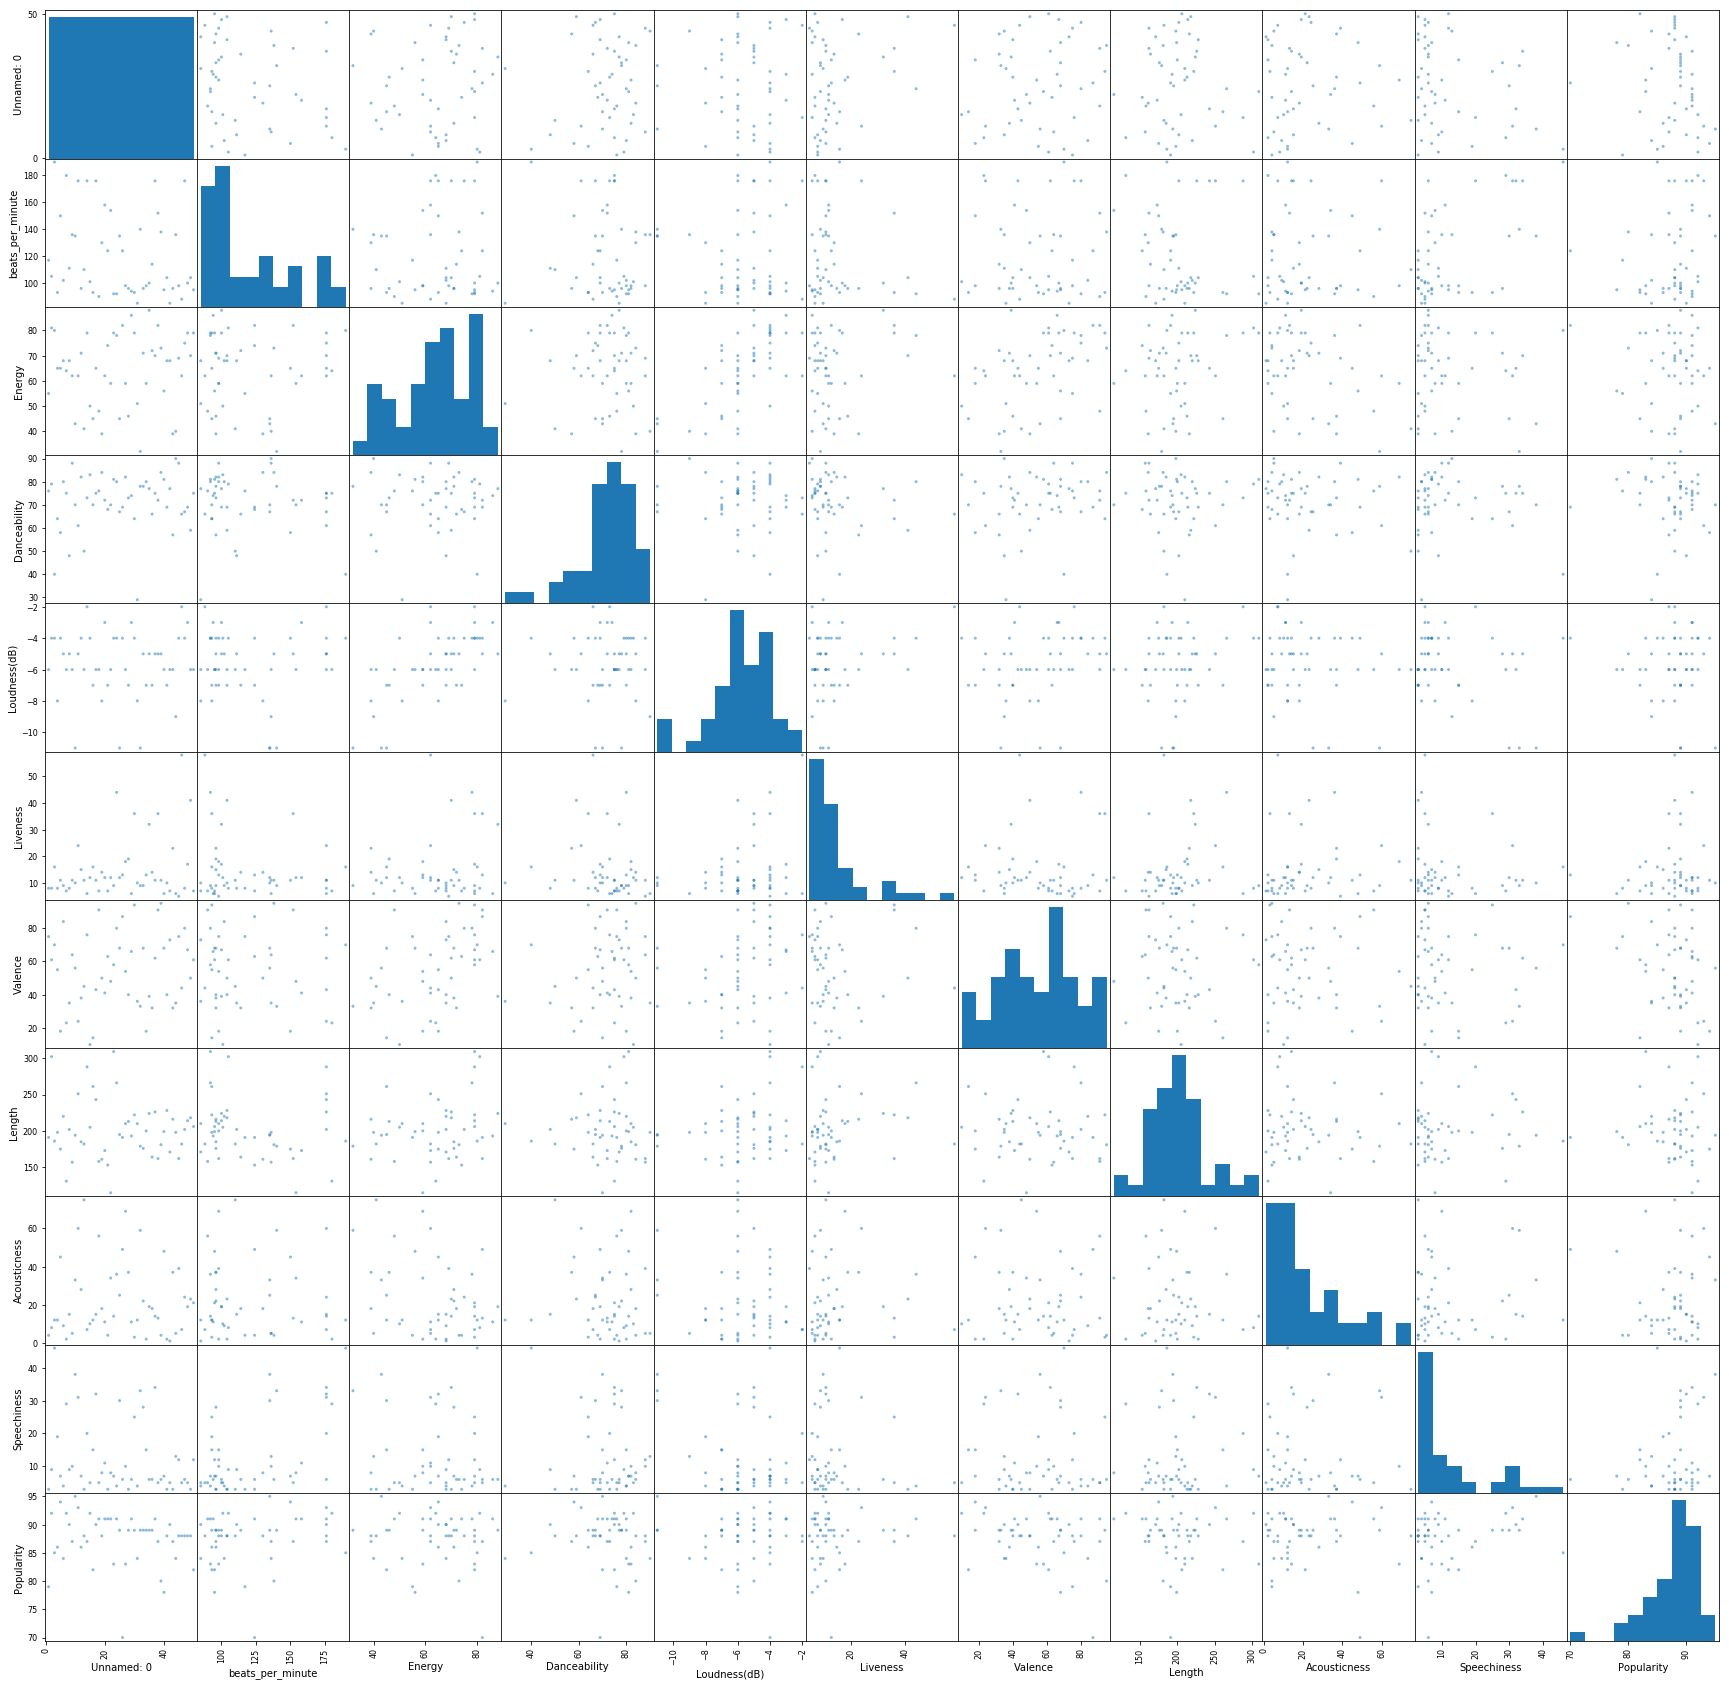

In [20]:
scatter_matrix(df)
plt.gcf().set_size_inches(30, 30)
plt.show()

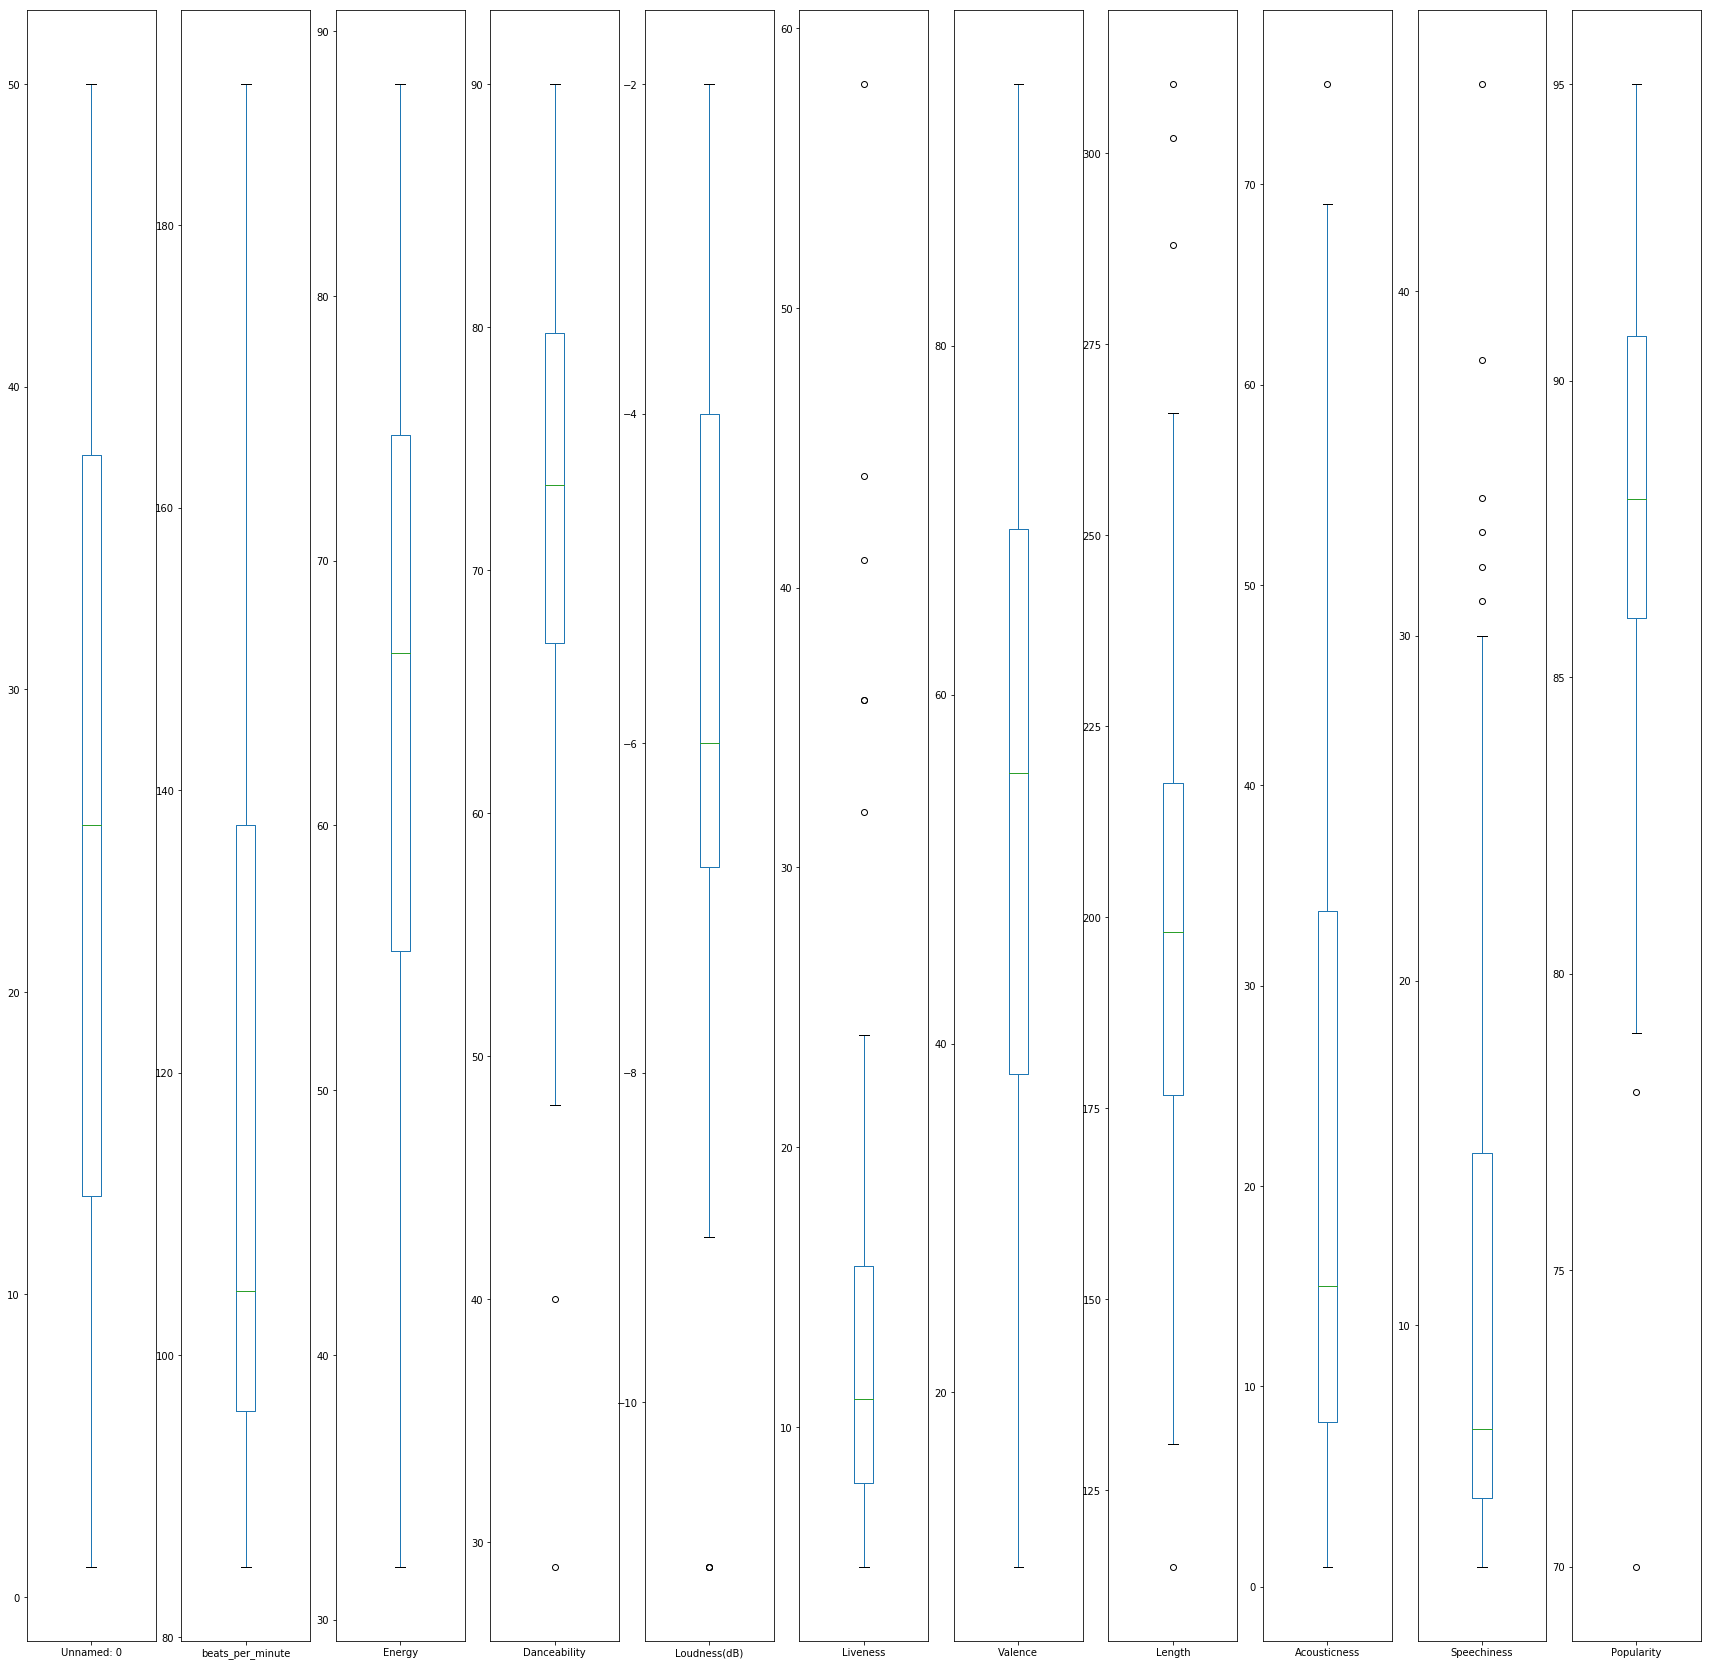

In [21]:
df.plot(kind='box', subplots=True)
plt.gcf().set_size_inches(30,30)
plt.show()

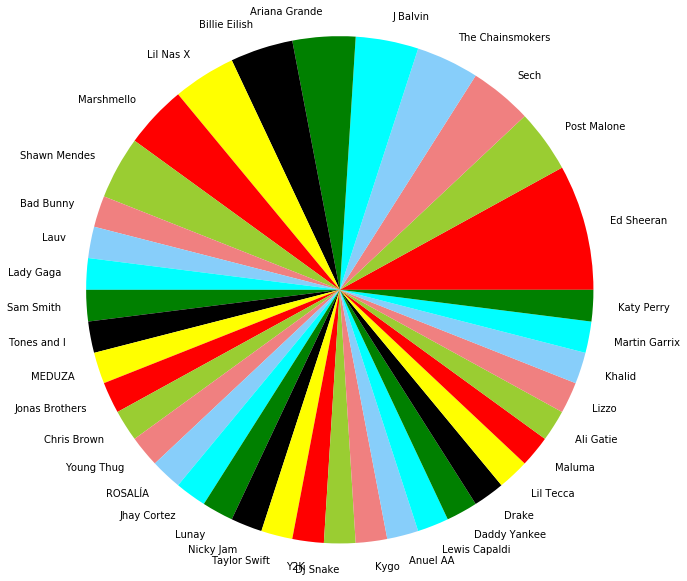

In [24]:
#Pie charts 
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [25]:
#Linear regression, first create test and train dataset
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [26]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [27]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

86.4529844287361
[ 0.04783564 -0.05258131 -0.00295564 -0.47310476  0.00273375]


In [28]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       82     88.576
1       84     90.565
2       91     86.571
3       70     88.209
4       88     87.879
5       84     87.320
6       94     88.011
7       91     87.555
8       89     88.111
9       91     87.278
10      87     86.508
11      86     89.430
12      87     87.180
13      84     87.239
14      90     87.993


In [29]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.174251322199701
Mean Squared Error: 35.83395112373873
Root Mean Squared Error: 5.986146600588623


Text(0, 0.5, 'Test values')

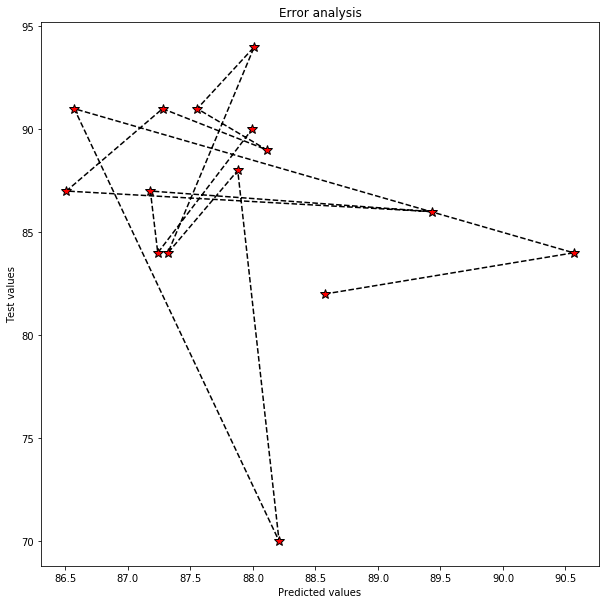

In [30]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [31]:
# Cross validation score
x=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_test, y_pred)-abs(mse_mean)
print(diff)

-20.80215204540807
15.031799078330657


In [32]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values

In [33]:
# Label encoding of features
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [34]:
# Label Encoding of target
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,6
1,19
2,8
3,15
4,9
5,15
6,20
7,15
8,7
9,11


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [36]:
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [37]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

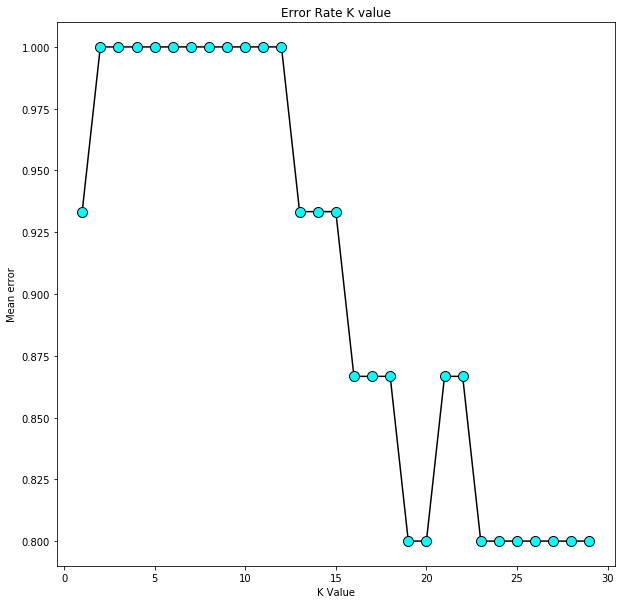

In [38]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='cyan',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [39]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [40]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [41]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87         91
1       79         92
2       90         91
3       82         88
4       87         91
5       93         87
6       88         91
7       89         89
8       91         91
9       88         87
10      89         91
11      91         89
12      88         87
13      92         91
14      91         89


In [42]:
# Testing the accuracy of Naive Bayes 
scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

9.569377990430622


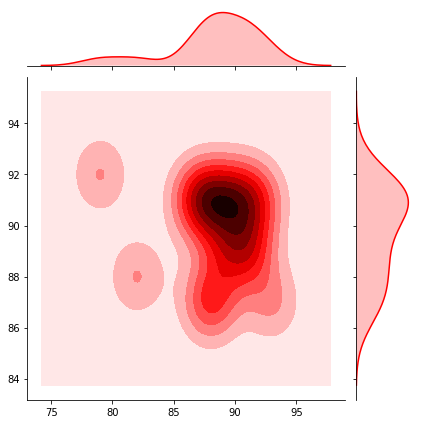

In [43]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="r")

In [44]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [46]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       91         91
1       78         78
2       89         89
3       90         91
4       88         89
5       91         89
6       84         90
7       89         88
8       83         83
9       84         84
10      88         87
11      94         94
12      89         89
13      89         89
14      91         83


In [47]:
# Testing the accuracy
scores=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

1.6666666666666667


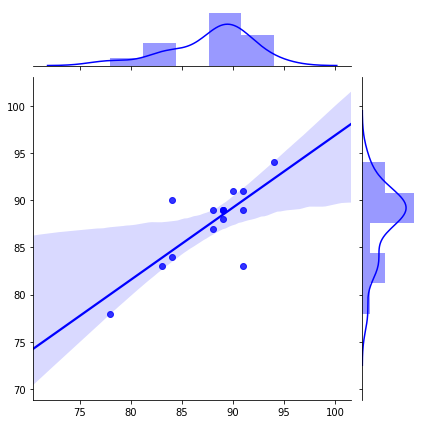

In [48]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="b");